<a href="https://colab.research.google.com/github/jdasam/mas1004-2023/blob/main/live_coding/4_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification
- In this notebook we will use the MNIST dataset to train a neural network to classify handwritten digits.

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# make plt grayscale as default
plt.rcParams['image.cmap'] = 'gray'

DEV = 'cuda' # Use GPU
assert torch.cuda.is_available()

## 0. Download Dataset

In [ ]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# See how our data looks like
# you can get the i-th data from the dataset class using dataset[i]
train_data[0] # this will return (image tensor, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
img, label = train_data[0] # A datasample is a pair of image and label

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
# you can delete axis that has only one item by squeeze
img = img.squeeze() # or img = img[0] or img = img[0, :, : ]
img.shape

torch.Size([28, 28])

Label is 5


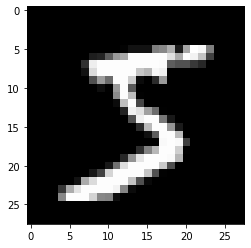

In [ ]:
plt.imshow(img),
print(f'Label is {label}') # f means formatted string

Label is 5


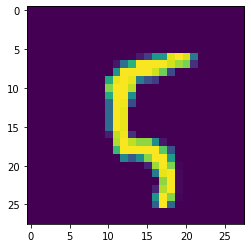

In [ ]:
data_idx = 100
img, label = train_data[data_idx]
plt.imshow(img.squeeze())
print(f'Label is {label}')



In [ ]:
# how many data exists in our train_data?
len(train_data)

60000

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
# We have to convert a tensor of 28, 28 to a tensor of 784

# we can reshape a tensor to have a specific shape

# -1 automatically decide the size of that dimension

In [ ]:
# reshape is a function that converts a shape of tensor into specific shape


In [ ]:
# let's collect 1000 data from train_data



In [ ]:
# img list is a list of tensor

# we want to convert a list of tensor to a single tensor

(list, torch.Tensor)

In [ ]:
# two ways to convert a list of tensor to a single tensor
# torch.cat() concatenates a list of tensor to an existing dim
# torch.stack() concatenates a list of tensor to a new dim


torch.Size([1000, 28, 28])

In [ ]:
(out[100] == img_list[100]).all()

tensor(True)

In [ ]:
# flatten that out tensor so that each datasample has 784 numbers



torch.Size([1000, 784])

#### Extra: Practice on Reshape

In [ ]:
# what is difference between reshape(1000, 784) and reshape(784, 1000)
test = torch.arange(784).repeat(1000, 1)
test, test.shape

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]), torch.Size([1000, 784]))

In [ ]:
test_flattened = test.reshape(-1) # 784000 dim vector
test_flattened.shape

torch.Size([784000])

In [ ]:
reshaped_a = test_flattened.reshape(1000, 784)
reshaped_b = test_flattened.reshape(784, 1000)
reshaped_a, reshaped_b

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]),
 tensor([[  0,   1,   2,  ..., 213, 214, 215],
         [216, 217, 218,  ..., 429, 430, 431],
         [432, 433, 434,  ..., 645, 646, 647],
         ...,
         [136, 137, 138,  ..., 349, 350, 351],
         [352, 353, 354,  ..., 565, 566, 567],
         [568, 569, 570,  ..., 781, 782, 783]]))

In [ ]:
dummy = torch.arange(12)
print(dummy)
print(dummy.reshape(3,4))
print(dummy.reshape(4,3))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [ ]:
label_tensor = torch.tensor(label_list)
flattened_data.shape, label_tensor.shape

(torch.Size([1000, 784]), torch.Size([1000]))

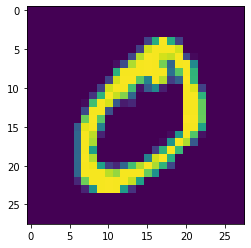

In [ ]:
first_data = flattened_data[1]
plt.imshow(first_data.reshape(28, 28))

In [ ]:
first_data.shape, first_data

(torch.Size([784]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        

## 1. Make Model

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()


  def forward(self, x): # x is an input
    # x is a tensor with a shape of [Num samples, 784]

    # we want to predict the probability of each category label for a given input
    # we have 10 different categories in our dataset
    return

model = Classifier()


tensor([-0.1659,  0.0405,  0.1256, -0.1109,  0.0020,  0.0152,  0.0636,  0.0304,
        -0.0631,  0.0379], grad_fn=<SelectBackward0>)

In [ ]:
# We want to convert the output into a range of probability
# Why we use softmax function

tensor([0.0846, 0.1040, 0.1133, 0.0894, 0.1001, 0.1014, 0.1065, 0.1030, 0.0938,
        0.1038], grad_fn=<SoftmaxBackward0>)

## 1.1 Make Softmax

In [ ]:
torch.set_printoptions(sci_mode=False)
def my_softmax(x, dim=0):
  return
my_softmax(out, dim=1)

tensor([[0.0846, 0.1040, 0.1133,  ..., 0.1030, 0.0938, 0.1038],
        [0.0892, 0.1041, 0.1066,  ..., 0.1001, 0.0964, 0.1062],
        [0.0856, 0.1026, 0.1082,  ..., 0.1042, 0.0980, 0.1086],
        ...,
        [0.0849, 0.1037, 0.1048,  ..., 0.1067, 0.0972, 0.1037],
        [0.0877, 0.1026, 0.1057,  ..., 0.1042, 0.0999, 0.1055],
        [0.0849, 0.1026, 0.1046,  ..., 0.1068, 0.0952, 0.1043]],
       grad_fn=<DivBackward0>)